# Part 2: Explanatory  data analysis of the FordGo Bike dataset

In this second part of the analysis of our dataset, we will go deeper into analyses and we will try to give some insights for the owners of the bikes system and their users.

In [148]:
# external imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# supressing warnings
import warnings
warnings.simplefilter("ignore")

In [149]:
#data loading
df = pd.read_csv("df_clean.csv")

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171234 entries, 0 to 171233
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   start_time                 171234 non-null  object 
 1   end_time                   171234 non-null  object 
 2   start_station_id           171234 non-null  int64  
 3   start_station_name         171234 non-null  object 
 4   start_station_latitude     171234 non-null  float64
 5   start_station_longitude    171234 non-null  float64
 6   end_station_id             171234 non-null  float64
 7   end_station_name           171234 non-null  object 
 8   end_station_latitude       171234 non-null  float64
 9   end_station_longitude      171234 non-null  float64
 10  bike_id                    171234 non-null  int64  
 11  user_type                  171234 non-null  object 
 12  member_birth_year          171234 non-null  int64  
 13  member_gender              17

In [151]:
df.head(5)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,member_gender,bike_share_for_all_trip,day,year,starting_hour,duration_min,age,age_group,age_group2,distance_between_stations
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,...,Male,No,Thursday,2019,17,869.750000,35,"(30, 35]","(25, 67]",0.54
1,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,...,Male,No,Thursday,2019,12,1030.900000,47,"(45, 60]","(25, 67]",2.70
2,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,...,Male,Yes,Thursday,2019,23,26.416667,45,"(40, 45]","(25, 67]",2.41
3,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,...,Male,No,Thursday,2019,23,29.883333,60,"(45, 60]","(25, 67]",3.33
4,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,...,Female,No,Thursday,2019,23,19.116667,36,"(35, 40]","(25, 67]",2.03


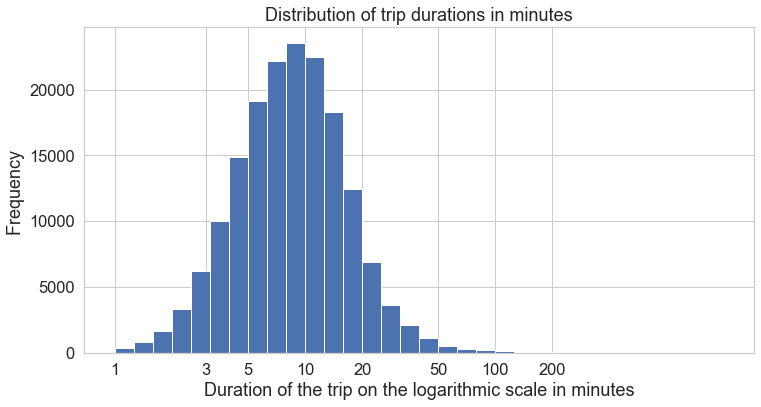

In [152]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)
plt.figure(figsize=[12, 6]);
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 3, 5, 10, 20, 50, 100,200], [1, 3, 5, 10, 20, 50, 100,200]);
plt.xlabel('Duration of the trip on the logarithmic scale in minutes');
plt.ylabel('Frequency ');
plt.title('Distribution of trip durations in minutes');

<b>Comment:</b> Most trips are about 3-20 minutes. If an user wants to be in TOP 1 of most fit users, this user should use the bike for at least 53 minutes. This summary statistics may be used to promote the gamification of this bikes to spread healthy lifestyle among bike users. As we have mobile apps that counts our steps during the days, we can do similar app that counts the kilometers that users make during the year. Users would compete with their coworkers.<br>
It can be used to choose what kind of tickets, we should offer for the customes of these bikes. One can suggest one option for short trips up to 20 minutes and second option, which will be more expensive for trip, which are longer than 20 minutes.

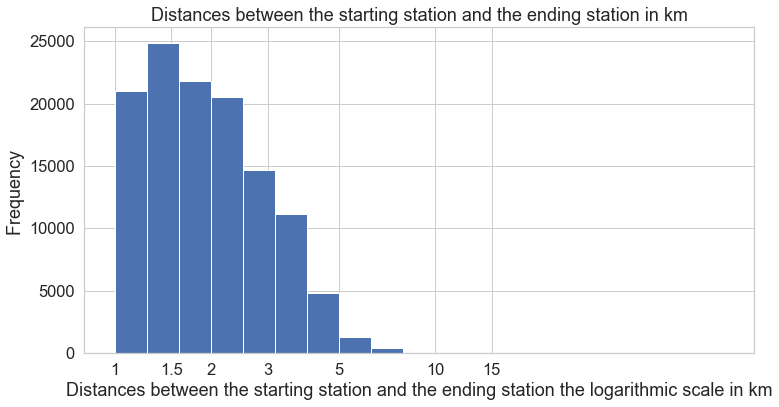

In [153]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df['distance_between_stations'].max())+log_binsize, log_binsize)
plt.figure(figsize=[12, 6]);
plt.hist(data = df, x = 'distance_between_stations', bins = bins);
plt.xscale('log');
plt.xticks([1,1.5,2, 3, 5, 10, 15], [1,1.5,2, 3, 5, 10, 15]);
plt.xlabel('Distances between the starting station and the ending station the logarithmic scale in km');
plt.ylabel('Frequency ');
plt.title('Distances between the starting station and the ending station in km');


<b>Comment:</b> For the distance_between_stations, we could have expected similar insigths as in the case of the duration time variable. These variables are positively correlated.  Most trips are between 0.6 km and 3.2 km. If an user wants to be in TOP 1 of most fit users, this user should use the bike for at least 5.1 km. It would be another  feature of the app created for the users of the system of bikes.

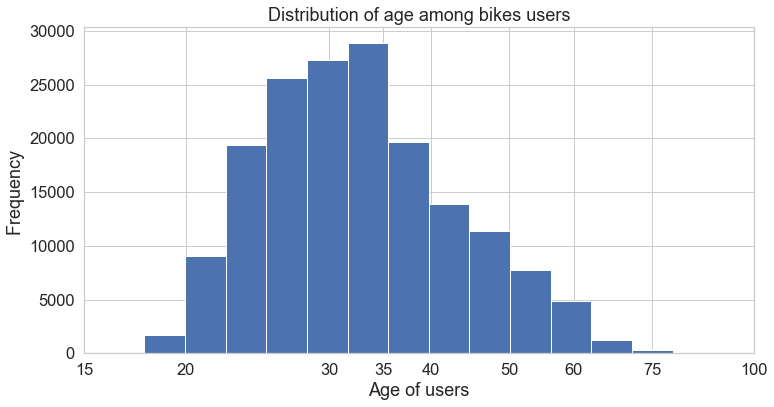

In [154]:
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df['age'].max())+log_binsize, log_binsize)
plt.figure(figsize=[12, 6]);
plt.hist(data = df, x = 'age', bins = bins);
plt.xscale('log');
plt.xticks([15, 20, 30, 35, 40, 50,60,75, 100], [15, 20, 30, 35, 40, 50,60,75, 100]);
plt.xlim(15, 100)
plt.xlabel('Age of users');
plt.ylabel('Frequency ');
plt.title('Distribution of age among bikes users');

<b>Comment:</b> This distribution is probably a result of age limitation among younger users. The user has probably to be at least 18 years old to use these bikes. Should the owners of the system, consider younger generation to be allowed to use this system too? How can we motivate younger generations between (18-25 years old) and older generations (over 60 years old) to use more bikes?

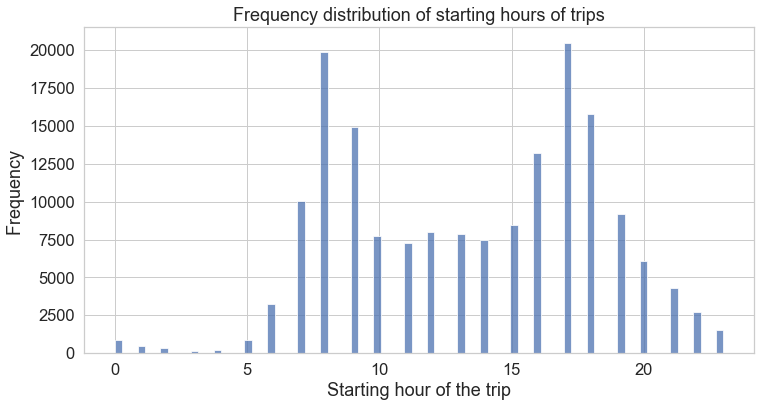

In [155]:
plt.figure(figsize=[12, 6]);
# exploring the duration time in minutes
sns.histplot(data=df, x="starting_hour")
plt.ylabel('Frequency ')
plt.xlabel('Starting hour of the trip')
plt.title('Frequency distribution of starting hours of trips');

<b>Comment:</b> 
Considering most frequent duration of trips, which is between 3 and 20 minutes, the starting hour of trips may suggest when users use bikes most frequently. 
As we can see most users start their trips at 9 am and at 5 pm. It probably means that most users of these bikes work or study. Thus, we can notice dips of usage of bikes during the night and in midle of a day between 10-15. If we want to repair, replace or move bikes from station to another, we should do it during the night or in a middle of a day. We should avoid doing it around 9 am and 5 pm.

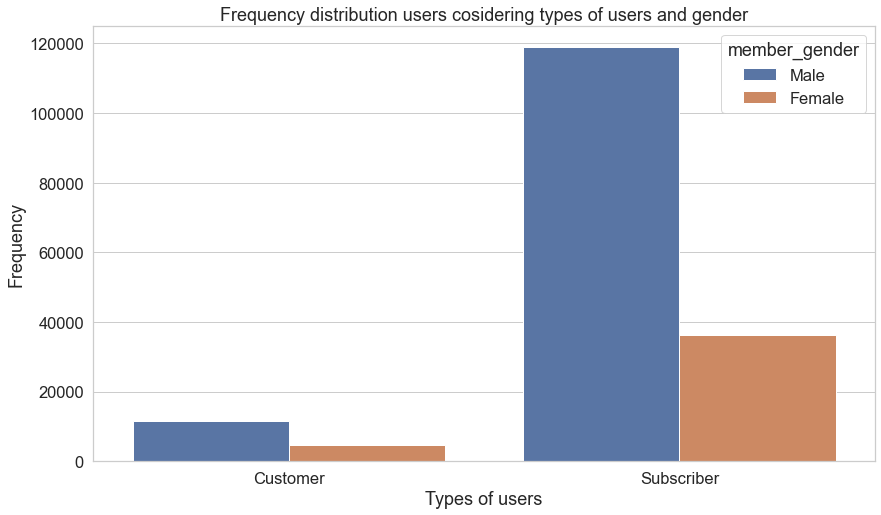

In [156]:
sns.countplot(x="user_type", hue="member_gender", data=df)
plt.ylabel('Frequency')
plt.xlabel('Types of users')
plt.title('Frequency distribution users cosidering types of users and gender');

<b>Comment:</b> There are far more men than women who use bikes among customers as well as subscribers. This simple distribution may push us to ask ourself why women use far less bikes than men? Are bikes too heavy for most women, are bikes not too comfortable for women, what can we do to attract more women to use bikes? <br>
One may ask also, if the payment for customers is too complicated? Do the customers have to put too much time to use bikes or is it simply related to the small number of tourists who use it compared to subricribers who are mostly locals?

In [157]:
days_dic =  {0:'Monday',
             1:'Tuesday',
             2:'Wednesday',
             3:'Thursday',
             4:'Friday',
             5:'Saturday',
             6:'Sunday'}

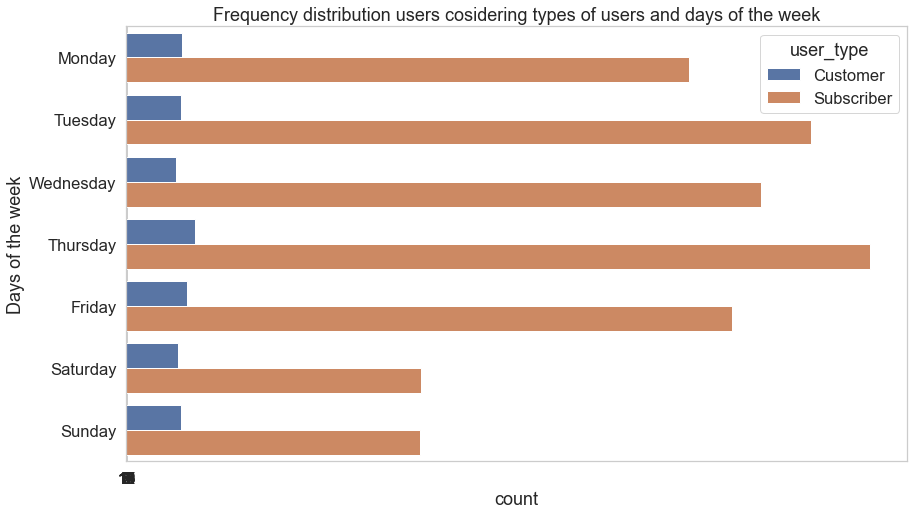

In [158]:

sns.countplot(y="day", hue="user_type", data=df, order=list(days_dic.values()))
plt.ylabel('Most frequent starting hour')
plt.xticks(np.arange(0, 20, 1));
plt.ylabel('Days of the week');
plt.title('Frequency distribution users cosidering types of users and days of the week');


<b>Comment:</b> For some reason, subscibers use less bikes on Saturday and Sunday. The owners of the system want probably that their bikes are used most of the time and uniformly over all days of the week. We can suggest to make some kind of promotional offers to incentivize users to use it more during weekends.

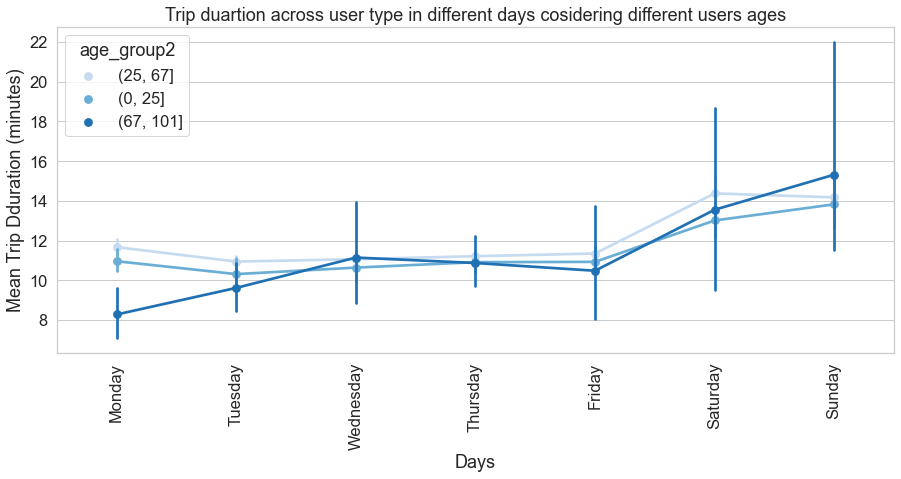

In [159]:
fig = plt.figure(figsize = [15,6])
sns.pointplot(data = df, x = 'day', y = 'duration_min', hue ='age_group2', palette = 'Blues'
             , order=list(days_dic.values()))
plt.title('Trip duartion across user type in different days cosidering different users ages')
plt.ylabel('Mean Trip Dduration (minutes)')
plt.xlabel('Days')
plt.xticks(rotation = 90)
plt.show();

<b>Comment:</b>  All group ages use bikes longer on weekends. I was expecting retired old people to use bikes longer during weekdays, but they probably use it during weekends with younger folks. But this difference is still weak, even though most people have more time on weekends, their trips on weekends are on average slightly longer.

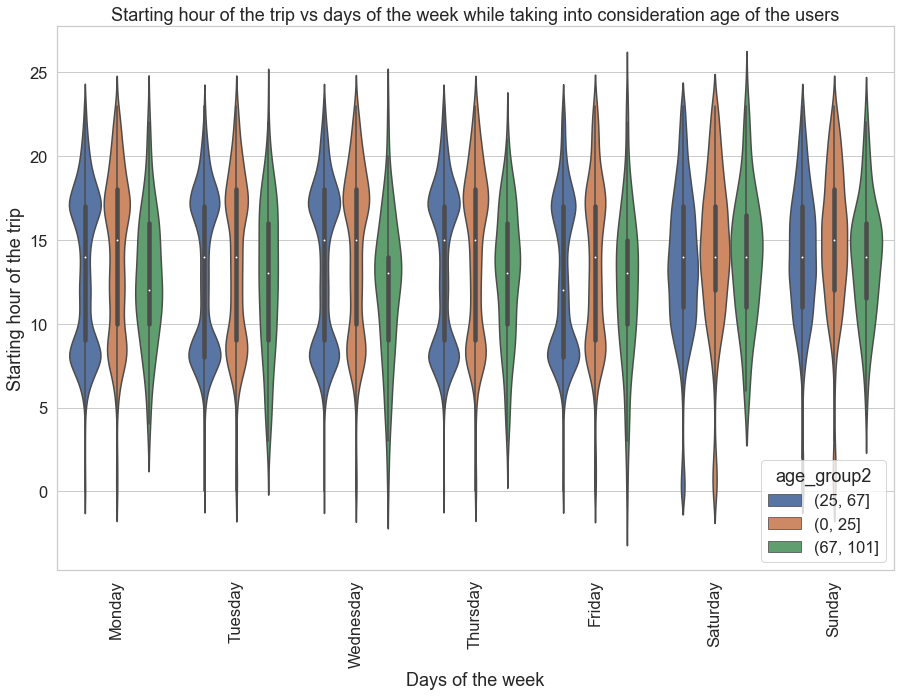

In [160]:
plt.figure(figsize=(15,10))
sns.violinplot(x="day", y="starting_hour", data = df, hue ='age_group2', order=list(days_dic.values()))
plt.title('Starting hour of the trip vs days of the week while taking into consideration age of the users')
plt.ylabel('Starting hour of the trip')
plt.xlabel('Days of the week')
plt.xticks(rotation = 90)
plt.show();

<b>Comment:</b>  As we can see, older and probably not working/retired people use mostly bikes in them middle of the day. Mostly working age people 25-65 years old use bikes before and after work during working days. Young people find themselves somewhere between old and working people as they have school or college with more flexibile hours than working people. As we saw on one of previous distributions, old people and young people are using bikes less than the group of 25 to 60 years old people. As these 3 groups, use bikes differently, it would be wise to motivate older people to use bikes more to make more out of this system.

# Discussion

Even this seemingly simple dataset had some serious errors due to unrealistic outliers regarding for age of 143, which means that the verification process should double check the data we put into the system. 
<br><br>
Older people have similar duration time of trips as younger people. Women use bikes less often than men. Older and younger people use bikes less often than people who are between 27 and 50 years old. There are far more subscribers than occasional customers of the system. I was expecting strong positive correlation between the distances between stations and duration of trips.
<br><br>
We could create an app for users of bikes to motivate them to use bikes more. The app would contain some summary statistics and rankings to allow users to compare their performances against the average user. We could make some promotional offers during weekends and during hours when the system is used less.

In [161]:
!jupyter nbconvert explanatory_Ford_GoBike.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook explanatory_Ford_GoBike.ipynb to slides
[NbConvertApp] Writing 788586 bytes to explanatory_Ford_GoBike.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\teodo\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\teodo\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\teodo\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\teodo\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\teodo\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename